# Replicating an FSL analysis

I start by running an FSL analysis on the `ds114_sub009_t2r1.nii` image.

I chose the following options for simplicity of the model:

* stats only (not preprocessing);
* turn off FILM prewhitening;
* use the `ds114_sub009_t2r1_cond.txt` 3 column file to define my events;
* use the double gamma HRF;
* turn off "Add temporal derivative";
* turn off "Apply temporal filtering".

See the file `ds114_sub009_t2r1_simple.fsf` for the analysis definition.

In [1]:
# We will need these later
from os import listdir  # To list the files in a directory
from os.path import join as pjoin  # To build file paths

In [2]:
# Our standard imports
import numpy as np  # The array library
np.set_printoptions(precision=4, suppress=True)
import numpy.linalg as npl  # The linear algebra part of numpy
import matplotlib.pyplot as plt  # The plotting library

In [3]:
# Show plots in the web browser
%matplotlib inline

In [4]:
# The library to load images
# You might need to do "pip install nibabel" in the Terminal
import nibabel as nib

We investigate the FEAT output directory:

In [5]:
feat_dir = 'ds114_sub009_t2r1.feat'
listdir(feat_dir)

['.ramp.gif', 'design.mat', 'stats']

There is a `stats` subdirectory in the FEAT directory, with some interesting files:

In [6]:
stats_dir = pjoin(feat_dir, 'stats')
listdir(stats_dir)

['cope1.nii.gz',
 'dof',
 'pe1.nii.gz',
 'sigmasquareds.nii.gz',
 'tstat1.nii.gz',
 'zstat1.nii.gz']

The `pe1.nii.gz` contains the Parameter Estimate for the regressor:

In [7]:
pe_fname = pjoin(stats_dir, 'pe1.nii.gz')
pe_fname

'ds114_sub009_t2r1.feat/stats/pe1.nii.gz'

It's an image, with one parameter estimate per voxel:

In [8]:
pe_img = nib.load(pe_fname)
pe_data = pe_img.get_fdata()
pe_data.shape

(64, 64, 30)

Here's the 15th slab in the Parameter Estimate volume:

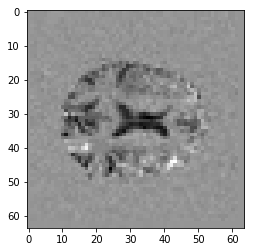

In [9]:
plt.imshow(pe_data[:, :, 14], cmap='gray')

Compare this image to the [first_activation notebook](https://github.com/matthew-brett/msc_imaging/blob/master/first_activation.ipynb) estimate we found.

The design matrix:

In [10]:
design_fname = pjoin(feat_dir, 'design.mat')
design_fname

'ds114_sub009_t2r1.feat/design.mat'

In [11]:
# Read contents of the design file
with open(design_fname, 'rt') as fobj:
    design = fobj.read()
print(design)

/NumWaves	1
/NumPoints	173
/PPheights		1.280507e+00

/Matrix
-4.855490e-01	
-4.855491e-01	
-4.855491e-01	
-4.855491e-01	
-4.831242e-01	
-2.687152e-01	
2.311866e-01	
5.548245e-01	
6.547042e-01	
6.450099e-01	
6.010161e-01	
5.601737e-01	
5.345309e-01	
5.219966e-01	
5.169302e-01	
5.151719e-01	
5.122089e-01	
2.976517e-01	
-2.022853e-01	
-5.259232e-01	
-6.258029e-01	
-6.161086e-01	
-5.721148e-01	
-5.312724e-01	
-5.056295e-01	
-4.930953e-01	
-4.880289e-01	
-4.862706e-01	
-4.833076e-01	
-2.687504e-01	
2.311866e-01	
5.548245e-01	
6.547042e-01	
6.450099e-01	
6.010161e-01	
5.601737e-01	
5.345309e-01	
5.219966e-01	
5.169302e-01	
5.151719e-01	
5.122089e-01	
2.976517e-01	
-2.022853e-01	
-5.259232e-01	
-6.258029e-01	
-6.161086e-01	
-5.721148e-01	
-5.312724e-01	
-5.056295e-01	
-4.930953e-01	
-4.880289e-01	
-4.862706e-01	
-4.833076e-01	
-2.687504e-01	
2.311866e-01	
5.548245e-01	
6.547042e-01	
6.450099e-01	
6.010161e-01	
5.601737e-01	
5.345309e-01	
5.219966e-01	
5.169302e-01	
5.151719e-01	
5.122089e-01	

In [12]:
regressor = np.loadtxt(design_fname, comments='/')
regressor

array([-0.4855, -0.4855, -0.4855, -0.4855, -0.4831, -0.2687,  0.2312,
        0.5548,  0.6547,  0.645 ,  0.601 ,  0.5602,  0.5345,  0.522 ,
        0.5169,  0.5152,  0.5122,  0.2977, -0.2023, -0.5259, -0.6258,
       -0.6161, -0.5721, -0.5313, -0.5056, -0.4931, -0.488 , -0.4863,
       -0.4833, -0.2688,  0.2312,  0.5548,  0.6547,  0.645 ,  0.601 ,
        0.5602,  0.5345,  0.522 ,  0.5169,  0.5152,  0.5122,  0.2977,
       -0.2023, -0.5259, -0.6258, -0.6161, -0.5721, -0.5313, -0.5056,
       -0.4931, -0.488 , -0.4863, -0.4833, -0.2688,  0.2312,  0.5548,
        0.6547,  0.645 ,  0.601 ,  0.5602,  0.5345,  0.522 ,  0.5169,
        0.5152,  0.5122,  0.2977, -0.2023, -0.5259, -0.6258, -0.6161,
       -0.5721, -0.5313, -0.5056, -0.4931, -0.488 , -0.4863, -0.4833,
       -0.2688,  0.2312,  0.5548,  0.6547,  0.645 ,  0.601 ,  0.5602,
        0.5345,  0.522 ,  0.5169,  0.5152,  0.5122,  0.2977, -0.2023,
       -0.5259, -0.6258, -0.6161, -0.5721, -0.5313, -0.5056, -0.4931,
       -0.488 , -0.4

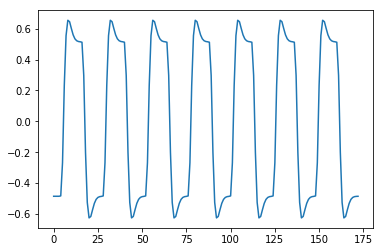

In [13]:
plt.plot(regressor)

Remember the [all_one_voxel notebook](https://nbviewer.jupyter.org/github/matthew-brett/msc_imaging/blob/master/all_one_voxel.ipynb)?

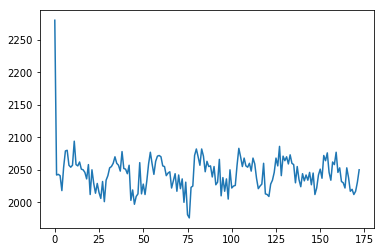

In [14]:
img = nib.load('ds114_sub009_t2r1.nii')
data = img.get_fdata()
voxel_time_course = data[42, 32, 19]
plt.plot(voxel_time_course)

Let's do our own regression:

In [15]:
N = data.shape[-1]
N

173

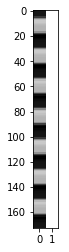

In [16]:
X = np.ones((N, 2))
X[:, 0] = regressor
plt.imshow(X, cmap='gray', aspect=0.1)

In [17]:
y = voxel_time_course
B = npl.pinv(X).dot(y)
B

array([   27.6368,  2044.7919])

What does FSL get for this voxel?

In [18]:
pe_data[42, 32, 19]

27.636846542358398

Remember our contrast, to select the slope of the regressor?

In [19]:
c = np.array([1, 0])

FSL has Contrast Of Parameter Estimate (COPE) files:

In [20]:
cope_fname = pjoin(stats_dir, 'cope1.nii.gz')
cope_img = nib.load(cope_fname)
cope_data = cope_img.get_fdata()
cope_data[42, 32, 19]

27.636846542358398

FSL also has a "sigmasquared" file:

In [21]:
ss_fname = pjoin(stats_dir, 'sigmasquareds.nii.gz')
ss_img = nib.load(ss_fname)
ss_data = ss_img.get_fdata()
ss_data[42, 32, 19]

600.3792724609375

Remember the fitted data, and the residuals?

In [22]:
fitted = X.dot(B)
residuals = y - fitted

We can calculate the variance with the degrees of freedom and the residuals:

In [23]:
# Degrees of freedom
df = N - npl.matrix_rank(X)
df

171

In [24]:
variance = np.sum(residuals ** 2) / df
variance

603.89025485586683

Oops - that is not the same as FSL.  It turns out FSL has given the data an extra degree of freedom:

In [25]:
# This file has the degrees of freedom
dof_fname = pjoin(stats_dir, 'dof')
with open(dof_fname, 'rt') as fobj:
    print(fobj.read())

172  



In [26]:
fsl_df = df + 1
fsl_variance = np.sum(residuals ** 2) / fsl_df
fsl_variance

600.37926500205367

Now let's do a t-test.

In [27]:
# Top of t - same as COPE
c = np.array([1, 0])
top_of_t = c.dot(B)
top_of_t

27.636845673434607

In [28]:
# Bottom of t - the standard error of the top part
design_part = c.dot(npl.inv(X.T.dot(X))).dot(c)
bottom_of_t = np.sqrt(fsl_variance * design_part)
bottom_of_t

3.6412936068015518

In [29]:
t = top_of_t / bottom_of_t
t

7.5898426926661173

What does FSL get?

In [30]:
t_fname = pjoin(stats_dir, 'tstat1.nii.gz')
t_img = nib.load(t_fname)
t_data = t_img.get_fdata()
t_data[42, 32, 19]

7.5898427963256836

Finally, the z value.  From FSL:

In [31]:
p_fname = pjoin(stats_dir, 'zstat1.nii.gz')
p_img = nib.load(p_fname)
p_data = p_img.get_fdata()
p_data[42, 32, 19]

7.0388059616088867

This comes about from the p value for the t statistic, transformed back to a Z score:

In [32]:
# Get p value from t distribution
from scipy.stats import t as t_distribution  # t distribution
p = t_distribution(fsl_df).sf(t)  # Survival function (1-cdf)
p

9.6950040188510654e-13

In [33]:
# Get matching z score from p value
from scipy.stats import norm  # Normal distribution
norm().isf(p)  # The Inverse Survival Function

7.0388017026662419